# Calculating time scales for *cis/trans* isomerization


In [1]:
pwd

'/Users/starwingchen/Voelz_Lab/git/peptoid_24summer/peptoid/19AE1-4-A/GAFF/protonated/HREX_500ns'

### Load in the omega angle trajectories by replica

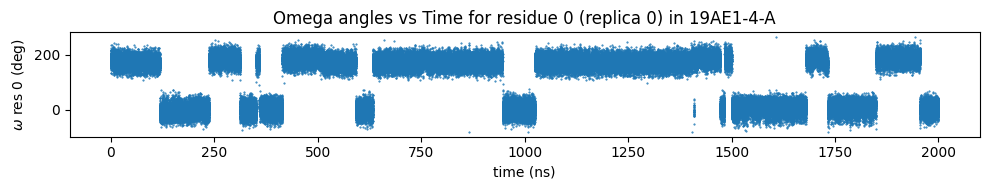

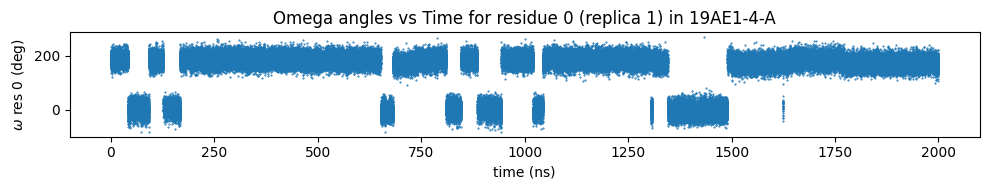

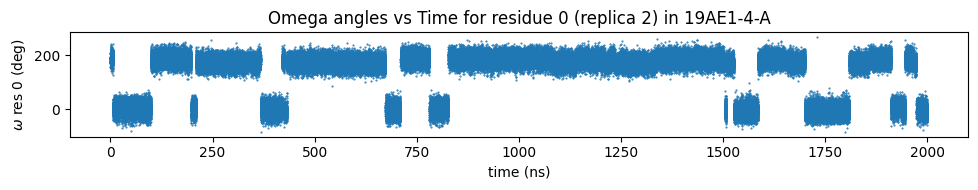

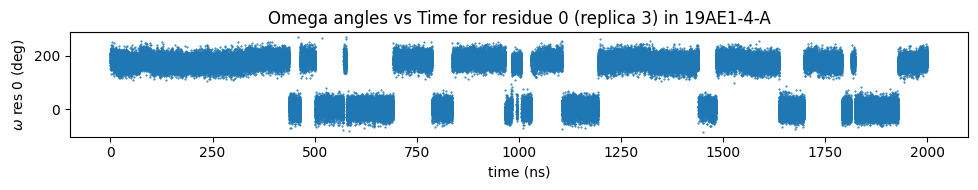

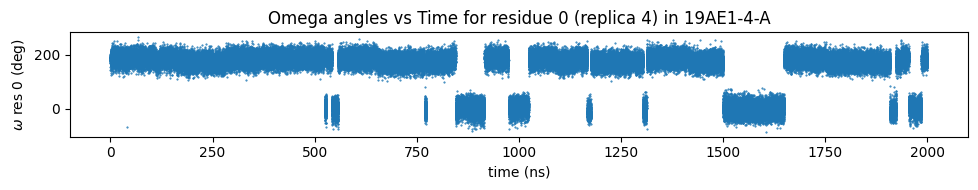

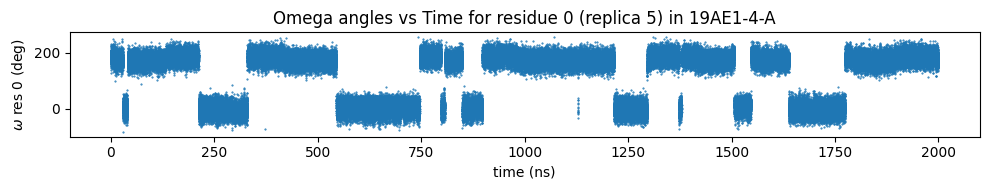

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Load in the omega angles by replica
dt_in_ns = 0.010   # 10 ps per snapshot
nreplicas = 6

omegas_by_replica = []
for i in range(nreplicas):
    # load in the angles
    angles = np.load(f'omega_data/omegas_rep{i}.npy') 
    # shift into (-90, 270) range to avoid periodic boundaries
    omegas_by_replica.append( (angles + 90.0)%360.0 - 90.0)
# print(omegas_by_replica)

# Plot omega angles vs time for selected residues for each replica
residues_to_plot = [0]
start = 0
nsnaps = 200004
for i in range(nreplicas):
    plt.figure(figsize=(10, 2))
    for panel, residue in enumerate(residues_to_plot, 1):
        plt.subplot(len(residues_to_plot), 1, panel)
        t = np.arange(start, nsnaps) * 0.010  # Time axis in ns
        plt.plot(t, omegas_by_replica[i][start:nsnaps, residue], '.', ms=1)
        plt.xlabel('time (ns)')
        plt.ylabel(f'$\\omega$ res {residue} (deg)')
        plt.title(f'Omega angles vs Time for residue {residue} (replica {i}) in 19AE1-4-A')
    plt.tight_layout()
plt.show()



## Convert the omega angle trajectories to cis(0)/trans(1) trajectories 

In [4]:
cistrans_by_replica = []
for i in range(nreplicas):
    cistrans_by_replica.append( (np.where(omegas_by_replica[i] > 90.0, 1, 0)).astype(int) )
#print(cistrans_by_replica)

#### compile transition probabilities as a function of lag time (in steps)

In [5]:
def get_transition_matrix(cistrans_traj, lagtime=10, sliding_window=True, pseudocount=0.25):
    """Returns a row-normalized transiton matrix T for a given lagtime (in steps)."""

    C = np.zeros( (2,2) )   # count matrix
    T = np.zeros( (2,2) )   # transition matrix
    
    N = len(cistrans_traj)  # the length of the trajectory
    for t in range(0, N-lagtime):
        C[cistrans_traj[t],cistrans_traj[t+lagtime]] += 1.0

    # add pseudocounts to avoid zero entries
    C += pseudocount    
    
    # row-normalize
    T[0,:] = C[0,:]/C[0,:].sum()
    T[1,:] = C[1,:]/C[1,:].sum()

    return T

def implied_timesale(T, lagtime=1):
    """Return the implied timescale, in units of number of steps.
    
    INPUT
    T       - transition matrix where T_ij is prob of transitioning i -> j in lagtime.
    
    PARAMETERS
    lagtime - lagtime used to build T (in units of steps). Default = 1
    
    RETURN
    t2      - the implied timescale (in units of steps)
    """
    try:
        evals = np.linalg.eigvals( T.transpose() )  # will be something like [0.99754545 1.        ]
        mu2 = min(evals) # non-stational eigenvalue of T
        # print('mu2', mu2, 'evals', evals, 'T', T)
        t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation
    except:
        t2 = np.nan
        
    return t2
    

## Let's make an implied timescale plot for each omega angle

lagtimes = [1, 10, 25, 50, 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 10100, 11100, 12100, 13100, 14100, 15100, 16100, 17100, 18100, 19100, 20100, 21100, 22100, 23100, 24100, 25100, 26100, 27100, 28100, 29100, 30100, 31100, 32100, 33100, 34100, 35100, 36100, 37100, 38100, 39100]


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_98319/3359252332.py:36: RuntimeWarning: invalid value encountered in log
  t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation
/Users/starwingchen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/starwingchen/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/starwingchen/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/starwingchen/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/starwingchen/anaconda3/lib/python3.11/site-

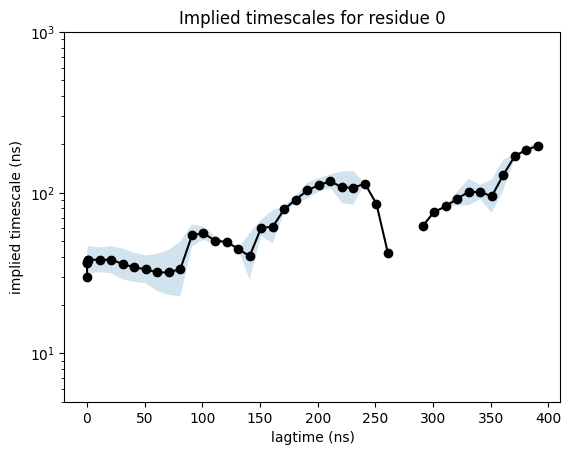

lagtimes = [1, 10, 25, 50, 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 10100, 11100, 12100, 13100, 14100, 15100, 16100, 17100, 18100, 19100, 20100, 21100, 22100, 23100, 24100, 25100, 26100, 27100, 28100, 29100, 30100, 31100, 32100, 33100, 34100, 35100, 36100, 37100, 38100, 39100]


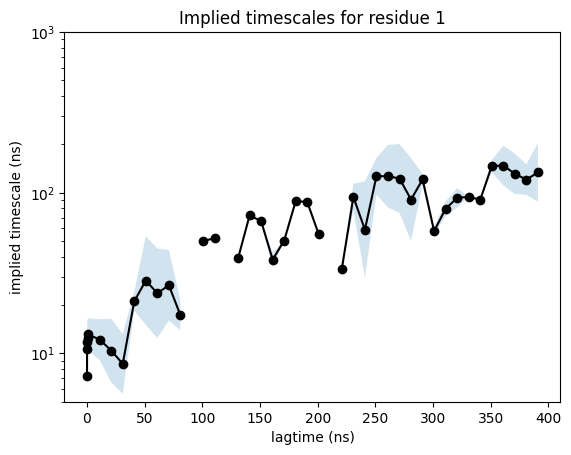

lagtimes = [1, 10, 25, 50, 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 10100, 11100, 12100, 13100, 14100, 15100, 16100, 17100, 18100, 19100, 20100, 21100, 22100, 23100, 24100, 25100, 26100, 27100, 28100, 29100, 30100, 31100, 32100, 33100, 34100, 35100, 36100, 37100, 38100, 39100]


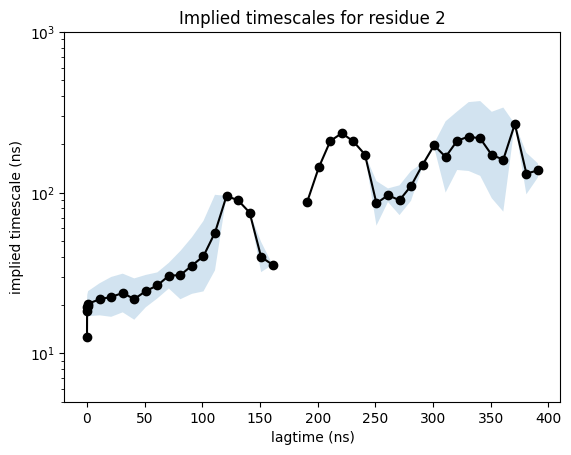

In [6]:
residues = [0,1,2]
for residue in residues:
    
    lagtimes = [1, 10, 25, 50] + list(range(100, 40000, 1000))
    print('lagtimes =', lagtimes)
    
    t2_means = []  # mean timescales for each lagtime
    t2_uppers  = []  # upperlim of standard deviation of log t2 for each lagtime
    t2_lowers  = []  # lowerlim
    
    for lagtime in lagtimes:
    
        # Each replica is a separate data set we can use for uncertainty estimation
        logt2_values = []    
        for i in range(nreplicas):
            T = get_transition_matrix(cistrans_by_replica[i][:,residue], lagtime=lagtime)
            logt2_values.append(np.log(implied_timesale(T, lagtime=lagtime)))
        logt2_values = np.array(logt2_values)    
        Ind = ~np.isnan(logt2_values)
        t2_means.append( np.exp(np.mean(logt2_values[Ind] ) ))
        t2_uppers.append( np.exp( np.mean(logt2_values[Ind] ) + np.std(logt2_values[Ind]) ))
        t2_lowers.append( np.exp( np.mean(logt2_values[Ind] ) - np.std(logt2_values[Ind]) ))
    
    t2_means = np.array(t2_means)
    t2_uppers = np.array(t2_uppers)
    t2_lowers = np.array(t2_lowers)
    lagtimes  = np.array(lagtimes)
    
    plt.figure()
    plt.plot(lagtimes*dt_in_ns, t2_means*dt_in_ns, 'ko-')
    plt.fill_between(lagtimes*dt_in_ns, t2_uppers*dt_in_ns, t2_lowers*dt_in_ns, alpha=0.2)
    plt.xlabel('lagtime (ns)')
    plt.ylabel('implied timescale (ns)')
    plt.ylim(5,1000)
    plt.yscale('log')
    plt.title(f'Implied timescales for residue {residue}')
    plt.show()
    

In [7]:
t2_values = np.array(t2_values)
~np.isnan(t2_values)


NameError: name 't2_values' is not defined

In [8]:
def autocorr(x):
    tau = x.size
    mu = x.mean()
    g = np.correlate(x, x, mode='full')[tau-1:]
    n = np.arange(tau,0,-1)
    return g/n

avg_autocorrel = [] 
for residue in range(3):
    all_autocorrel = []
    for replica in range(6):
        # Example calculation, replace with your actual calculation
        cis_trans = np.where(all_omegas[replica,:,residue] > 90.0, 1.0, 0.0)
        print(f"residue {residue}, replica {replica}, cis_trans: {cis_trans}")
        
        all_autocorrel.append(autocorr(cis_trans))
    
    avg_autocorrel.append(np.array(all_autocorrel).mean(axis=0))
    outfile = f'omega_data/omega_autocorrel_residue{residue}.npy'
    print(f"Saving {outfile} ...")
    np.save(outfile, avg_autocorrel[-1]) 


NameError: name 'all_omegas' is not defined

In [9]:
avg_autocorrels = []
plt.figure(figsize=(6,5))
t = np.arange(0, len(cis_trans))*0.010 # frames saved every 10 ps

for residue in range(0,3):   # the last residue
    infile = f'omega_data/omega_autocorrel_residue{residue}.npy'
    data = np.load(infile)
    avg_autocorrels.append(data)
    plt.plot(t, data, label='res %d'%residue)
    plt.xlim(0,400) # only show first part of the autocorrelation curves
    plt.ylim(0,0.2) # only show first part of the autocorrelation curves

plt.xlabel('time (ns)')
plt.ylabel('autocorrelation of omega angles')
plt.legend(loc='upper right', fontsize=12)

plt.show()

NameError: name 'cis_trans' is not defined

<Figure size 600x500 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Functional form for fitting
def single_exp_decay(x, a0, a1, tau):
    return a0 + a1 * np.exp(-x / tau)

# Fit each autocorrelation and plot results
fit_taus = []

plt.figure(figsize=(12, 6))

# Loop over each residue
for residue in range(3):
    
    # Initial guess for fitting parameters
    first_value = avg_autocorrels[residue][0]
    initial_guess = [first_value / 2.0, first_value / 2.0, 40.0]  # Initial guess [a0, a1, tau]
    
    # Perform curve fitting
    popt, pcov = curve_fit(single_exp_decay, t[:40000], avg_autocorrels[residue][:40000], p0=initial_guess)
    
    # Compute fitted curve
    y_fit = single_exp_decay(t[:40000], *popt)
    
    # Collect fitted tau values
    fit_taus.append(popt[2])
    
    # Print fit results
    print(f'--- Residue {residue} ---')
    print('### FIT to a0 + a1*exp(-(x/tau)) ###')
    print(f'Best-fit a0: {popt[0]} +/- {pcov[0][0]}')
    print(f'Best-fit a1: {popt[1]} +/- {pcov[1][1]}')
    print(f'Best-fit tau: {popt[2]} +/- {pcov[2][2]}')

    # Plot original data and fitted curve
    plt.subplot(1, 2, 1)
    plt.plot(t[:40000], avg_autocorrels[residue][:40000], label=f'Residue {residue}')
    plt.plot(t[:40000], y_fit, 'k--', label='Fit')
    plt.xlim(0, 400)
    plt.ylim(0, 0.2)
    plt.xlabel('Time (ns)')
    plt.ylabel('Autocorrelation of Omega Angles')
    plt.legend(loc='upper right', fontsize=10)
    
# Plotting the fitted tau values
plt.subplot(1, 2, 2)
plt.plot(range(1, 4), fit_taus, '*', markersize=10)
plt.xlim(0, 4)
plt.xlabel('Residue')
plt.ylabel('Autocorrelation Time (ns)')
plt.tight_layout()

plt.show()


IndexError: list index out of range

<Figure size 1200x600 with 0 Axes>